# Modelo VGG16 Preentrenado para Clasificación de Imágenes

## Introducción
En esta lección, aprenderemos a usar el modelo VGG16 preentrenado para la tarea de clasificación de imágenes. VGG16 es una arquitectura profunda de red neuronal que demostró ser efectiva para reconocer imágenes.

## Objetivo
El objetivo de este cuaderno es construir un modelo de clasificación de imágenes que clasifique imágenes de gatos y perros utilizando transfer learning.

In [1]:
# Importamos TensorFlow, la principal biblioteca para Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16 # Para cargar el modelo VGG16
from tensorflow.keras.preprocessing import image # Para cargar imágenes
from tensorflow.keras.models import Model # Para construir nuestro nuevo modelo
from tensorflow.keras.layers import Dense, Flatten # Para añadir capas a nuestro modelo
import numpy as np # Para manipular arreglos de números
import matplotlib.pyplot as plt # Para mostrar imágenes

##Carga del Modelo VGG16


In [2]:
# Cargamos el modelo VGG16 preentrenado en el conjunto de datos ImageNet.
# 'weights="imagenet"': Usa los pesos entrenados en ImageNet.
# 'include_top=False': Quitamos la capa final de clasificación para que podamos añadir la nuestra.
# 'input_shape=(224, 224, 3)': Le decimos al modelo el tamaño de las imágenes que va a esperar (altura, anchura, canales de color RGB).
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Opcional: Mostramos un resumen del modelo para ver sus capas (no es necesario entenderlo todo)
# base_model.summary()
print("Modelo VGG16 cargado exitosamente. Es la 'base de conocimiento' de nuestro experto.")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Modelo VGG16 cargado exitosamente. Es la 'base de conocimiento' de nuestro experto.


##Preparación del Modelo


In [3]:
# Congelamos las capas del modelo base para que no se reentrenen.
# Así, solo ajustaremos las nuevas capas que añadiremos.
base_model.trainable = False
print("Capas del modelo base congeladas. ¡Listo para añadir nuestra parte específica!")

Capas del modelo base congeladas. ¡Listo para añadir nuestra parte específica!


In [4]:
# Creamos una nueva capa que 'aplanará' la salida del modelo base.
# Esto es como tomar toda la información visual del experto y convertirla en una lista de números.
x = Flatten()(base_model.output)

# Añadimos una capa densa (o completamente conectada) con activación 'relu'.
# Esta capa aprenderá patrones complejos de la información aplanada.
x = Dense(256, activation='relu')(x)

# Añadimos la capa final de salida.
# Si tenemos 2 clases (ej. perro/gato), usaremos 'Dense(2)' y activación 'sigmoid' (para clasificación binaria).
# Si tuviéramos N clases (ej. perro, gato, pájaro, caballo), usaríamos 'Dense(N)' y activación 'softmax'.
output = Dense(2, activation='sigmoid')(x) # Asumiendo 2 clases: Perro y Gato

# Creamos el modelo final, combinando el modelo base y nuestras nuevas capas.
model = Model(inputs=base_model.input, outputs=output)

print("Nuevas capas añadidas. ¡Nuestro experto ya tiene una nueva 'cabeza' para nuestra tarea!")
# model.summary() # Puedes descomentar para ver el resumen del modelo completo

Nuevas capas añadidas. ¡Nuestro experto ya tiene una nueva 'cabeza' para nuestra tarea!


##Preparación del Dataset

In [5]:
import os
# Crea las carpetas para el dataset
# os.makedirs('data/train/cats', exist_ok=True)
# os.makedirs('data/train/dogs', exist_ok=True)
# print("Carpetas 'data/train/cats' y 'data/train/dogs' creadas.")

# Crea las carpetas para el dataset
os.makedirs('data/train/person-without-mask', exist_ok=True)
os.makedirs('data/train/person-with-mask', exist_ok=True)
print("Carpetas 'data/train/person-without-mask' y 'data/train/person-with-mask' creadas.")

Carpetas 'data/train/person-without-mask' y 'data/train/person-with-mask' creadas.


In [6]:
%%capture
#!unzip gatos.zip -d data/train/cats
!unzip person-front.zip -d data/train/person-without-mask

In [7]:
%%capture
# !unzip perros.zip -d data/train/dogs
!unzip person-with-mask.zip -d data/train/person-with-mask

In [8]:
# !mv data/train/cats/gatos/* data/train/cats/
#
# !rmdir data/train/cats/gatos
# !mv data/train/dogs/perros/* data/train/dogs/
#
# # 3. (Opcional) Elimina la carpeta 'perros' vacía
# !rmdir data/train/dogs/perros

In [9]:
!mv data/train/person-without-mask/person-front/* data/train/person-without-mask/
!rmdir data/train/person-without-mask/person-front

!mv data/train/person-with-mask/person-with-mask/* data/train/person-with-mask/
# 3. (Opcional) Elimina la carpeta 'perros' vacía
!rmdir data/train/person-with-mask/person-with-mask

In [10]:
# Definimos el tamaño de las imágenes que VGG16 espera
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32 # Número de imágenes que procesaremos a la vez (puedes probar con 4 o 8 si tu dataset es muy pequeño)

# Cargamos las imágenes desde nuestras carpetas.
# 'labels="inferred"' significa que Keras deduce las etiquetas de los nombres de las carpetas.
# 'image_size' redimensiona las imágenes.
# 'batch_size' para procesar en grupos.
train_ds = tf.keras.utils.image_dataset_from_directory(
    './data/train',
    labels='inferred',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

print(f"Dataset de entrenamiento cargado. Clases encontradas: {train_ds.class_names}")

# Opcional: Visualiza algunas imágenes del dataset para verificar
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(min(9, len(images))): # Muestra hasta 9 imágenes
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(train_ds.class_names[labels[i]])
#         plt.axis("off")
# plt.show()

Found 164 files belonging to 2 classes.
Dataset de entrenamiento cargado. Clases encontradas: ['person-with-mask', 'person-without-mask']


 ## Compilación y Entrenamiento del Modelo

In [11]:
# Compilamos el modelo.
# 'optimizer="adam"': El algoritmo que ajustará los pesos de las capas nuevas.
# 'loss="binary_crossentropy"': La función que mide qué tan bien lo está haciendo el modelo (para 2 clases).
# 'metrics=["accuracy"]': La métrica que queremos ver durante el entrenamiento (qué tan preciso es).
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Modelo compilado y listo para entrenar.")

Modelo compilado y listo para entrenar.


In [12]:
# Entrenamos el modelo.
# 'train_ds': Nuestros datos de entrenamiento.
# 'epochs=5': El número de veces que el modelo verá todo el dataset.
# ¡Experimenten con el número de epochs!
history = model.fit(train_ds, epochs=20)

print("\nEntrenamiento finalizado.")

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 820ms/step - accuracy: 0.7994 - loss: 6.8533
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.9331 - loss: 3.5209
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9391 - loss: 2.0114
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9773 - loss: 0.5269
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9983 - loss: 0.0176    
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9878 - loss: 0.2947
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 1.0000 - loss: 2.8457e-09
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 1.0000 - loss: 4.0245e-09
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.9948 - loss: 0.1505
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accu

In [13]:
def normalize_image(img):
    """ Cargamos la imagen y la redimensionamos al tamaño esperado por el modelo """
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Añadimos una dimensión extra para el batch
    img_array /= 255.0 # Normalizamos los valores de píxeles (0-1)
    return img_array

def get_image_url_tf(url_file):
    """  Descargamos la imagen usando tensorflow"""
    img_path = None
    try:
        img_path = tf.keras.utils.get_file(url_file)
    except Exception:
        print("No se pudo descargar la imagen, asegúrate que la URL es correcta.")
    return img_path

##Evaluación del Modelo

In [24]:
def predict_image_from_model(model, path_img=None, img_url=None, train_dataset=None, height_width=224):
    path_image = None
    if not (path_img or img_url):
        raise ValueError("Se debe proporcionar al menos una de las siguientes entradas: 'path_img' o 'url'.")

    if img_url:
        path_image = get_image_url_tf(img_url)
    elif path_img:
        path_image = path_img

    img = image.load_img(path_image, target_size=(height_width, height_width)) # suelen ser cuadradas

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch
    img_array /= 255.0  # Normalizar valores de píxeles

    # Realizamos la predicción
    predictions = model.predict(img_array)
    pred_clase_1 = predictions[0][0]
    pred_clase_2 = predictions[0][1]
    pred = 0
    if pred_clase_1 < pred_clase_2:
        pred = 1
    class_names = train_ds.class_names # Las clases que encontró tu dataset (ej. ['cats', 'dogs'])
    #class_names = train_dataset.class_names if train_dataset else ["Clase 0", "Clase 1"]

    # Si tienes 2 clases y sigmoid, la salida es un valor entre 0 y 1.
    # Si es >0.5 es la clase 1, si es <0.5 es la clase 0.
    predicted_class_index = (predictions[0][0] > predictions[0][1]).astype(int)
    predicted_class_name = class_names[pred]
    confidence = predictions[0][0] if predicted_class_index == 1 else (1 - predictions[0][0])

    # Visualizar la imagen y la predicción
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicción: {predicted_class_name} (Confianza: {confidence:.2f})")
    plt.show()

    # Imprimir resultados
    print(f"Predicción numérica: {predictions[0]}")
    print(f"Clases del dataset: {class_names}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


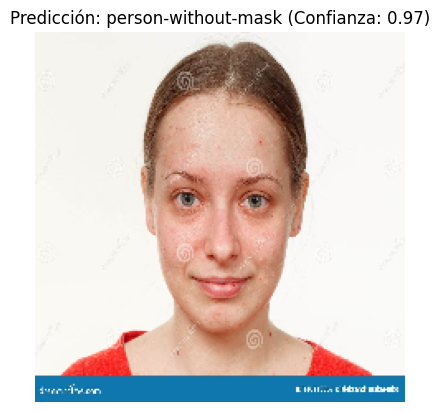

Predicción numérica: [0.02503952 0.9972332 ]
Clases del dataset: ['person-with-mask', 'person-without-mask']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


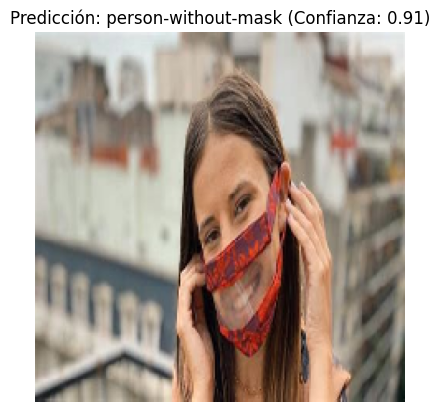

Predicción numérica: [0.08595654 0.9408636 ]
Clases del dataset: ['person-with-mask', 'person-without-mask']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


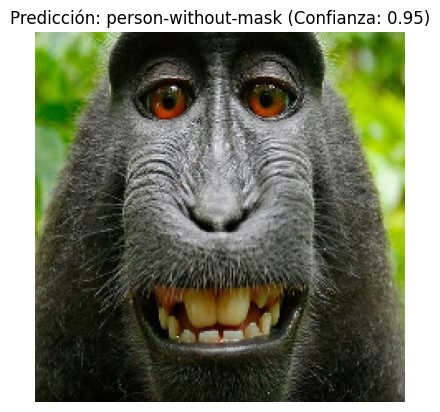

Predicción numérica: [0.04970567 0.9970197 ]
Clases del dataset: ['person-with-mask', 'person-without-mask']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


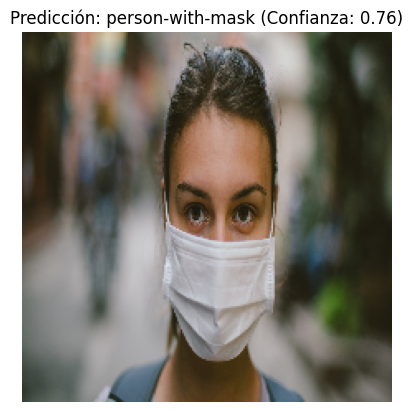

Predicción numérica: [0.76336783 0.22291106]
Clases del dataset: ['person-with-mask', 'person-without-mask']


In [27]:
img_url = None #"https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/1200px-Cat_August_2010-4.jpg" # URL de un gato
# img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Canis_lupus_familiaris_%28dog%29.jpg/1200px-Canis_lupus_familiaris_%28dog%29.jpg" # URL de un perro
path_girl = "girl-without-mask.jpg" # Cargada en el colab
path_mask = "girl-mask-trans.jpeg"

predict_image_from_model(model, path_girl)
predict_image_from_model(model, path_mask)
predict_image_from_model(model, "mono.jpg")
predict_image_from_model(model, "girl-mask.jpg")



A diferencia del notebook de transferencia de aprendizaje  este modelo brinda la estimación